## MACHINE LEARNING DAY-6 : RIDGE(L2) AND LASSO(L1)

**L1 and L2 regression** refer to **regularization techniques** used in linear regression (and other machine learning models) to prevent **overfitting** by adding a penalty to the loss function.

---

### L1 Regression (Lasso Regression)

* **L1 regularization** adds the **absolute value** of the coefficients as a penalty term to the loss function.

#### Objective Function:

$$
\text{Loss} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p}|\beta_j|
$$

* `λ` (lambda) is the regularization parameter.
* `β_j` are the model coefficients.
* Encourages **sparse** models (i.e., some coefficients become **exactly zero**).
* Useful for **feature selection**.

#### Characteristics:

* Shrinks some coefficients to zero → simpler model.
* Good when you suspect only **a few features are important**.

---

### L2 Regression (Ridge Regression)

* **L2 regularization** adds the **square of the coefficients** as a penalty term.

#### Objective Function:

$$
\text{Loss} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p}\beta_j^2
$$

* Tends to **shrink** coefficients but not necessarily to zero.
* Keeps **all features**, but reduces their impact.

#### Characteristics:

* Useful when you believe **all features contribute a little**.
* Less prone to removing features completely.

---

### Key Differences

| Aspect                | L1 (Lasso)                            | L2 (Ridge)                    |
| --------------------- | ------------------------------------- | ----------------------------- |
| Penalty               | Absolute values                       | Squared values                |
| Coefficient shrinkage | Can become zero                       | Shrinks toward zero           |
| Feature selection     | Yes (Sparse model)                    | No                            |
| Computation           | Less stable (non-differentiable at 0) | More stable (smooth gradient) |
| Best use case         | When few features matter              | When all features matter      |

---

### Elastic Net

* Combines **L1 + L2** regularization.

$$
\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda_1 \sum |\beta_j| + \lambda_2 \sum \beta_j^2
$$

Best of both worlds – use when you have **many correlated features**.

### Importing the Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [6]:
df = pd.read_csv('../datasets/50_Startups.csv')
print(df.tail())

    R&D Spend  Administration  Marketing Spend       State    Profit
45    1000.23       124153.04          1903.93    New York  64926.08
46    1315.46       115816.21        297114.46     Florida  49490.75
47       0.00       135426.92             0.00  California  42559.73
48     542.05        51743.15             0.00    New York  35673.41
49       0.00       116983.80         45173.06  California  14681.40


In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)
print('\n')
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

### Encoding Categorical Data

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)
print('\n')
print(X_test)
print('\n')
print(y_train)
print('\n')
print(y_test)

[[0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [1.

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])
print(X_train)
print('\n')
print(X_test)

[[0.0 1.0 0.0 -0.3500645436227844 -0.7854710924793271 0.1011968019362538]
 [0.0 0.0 1.0 -0.555303187426314 -1.481174262628151 0.02734979174277092]
 [0.0 1.0 0.0 0.07935762307586282 0.8013338146656704 -0.551521323997471]
 [1.0 0.0 0.0 -0.5463823849331263 1.3250581707161837 0.07011683779235604]
 [0.0 1.0 0.0 0.4348537132854595 -0.3559866348200946 0.7514851578736048]
 [0.0 1.0 0.0 1.2694314288195354 0.855185185174973 0.986031184474382]
 [0.0 1.0 0.0 1.045250070905001 1.2807704710942711 0.44039999942558483]
 [0.0 0.0 1.0 -1.529843000700978 0.029420649133439825 -1.6218751012780783]
 [0.0 0.0 1.0 -1.5397625087372082 -2.767672641730695 -1.6372965026688253]
 [0.0 0.0 1.0 -0.13115188245559178 1.144977005989267 -0.7694999122824163]
 [0.0 0.0 1.0 0.927916133722245 -0.029920619212990152 0.4830316172654914]
 [0.0 1.0 0.0 -0.20932933131592557 -0.29937679537926 -0.8991541175619614]
 [1.0 0.0 0.0 -0.17870827894287686 0.2251351979981532 -1.2640164249123271]
 [1.0 0.0 0.0 0.13747089788308053 -0.06929437

### Training the Ridge and Lasso model on the whole dataset

In [15]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression with cross-validated alpha
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Lasso Regression with adjusted parameters
lasso_reg = Lasso(alpha=0.01, max_iter=10000)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=10000)

### Predict a new result with Ridge

In [17]:
y_pred_ridge = ridge_reg.predict(X_test)

print("Ridge Regression Predictions vs Actual:")
for pred, actual in zip(y_pred_ridge, y_test):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

Ridge Regression Predictions vs Actual:
Predicted: 103409.84, Actual: 103282.38
Predicted: 131038.80, Actual: 144259.40
Predicted: 130934.39, Actual: 146121.95
Predicted: 72408.13, Actual: 77798.83
Predicted: 176428.55, Actual: 191050.39
Predicted: 118061.35, Actual: 105008.31
Predicted: 68987.45, Actual: 81229.06
Predicted: 99037.58, Actual: 97483.56
Predicted: 114625.47, Actual: 110352.25
Predicted: 165673.05, Actual: 166187.94


### Predict a new result with Lasso

In [19]:
# Predicting the Test set results with Lasso
y_pred_lasso = lasso_reg.predict(X_test)

# Displaying predictions vs actual
print("Lasso Regression Predictions vs Actual:")
for pred, actual in zip(y_pred_lasso, y_test):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

Lasso Regression Predictions vs Actual:
Predicted: 103015.22, Actual: 103282.38
Predicted: 132582.31, Actual: 144259.40
Predicted: 132447.80, Actual: 146121.95
Predicted: 71976.15, Actual: 77798.83
Predicted: 178537.53, Actual: 191050.39
Predicted: 116161.17, Actual: 105008.31
Predicted: 67851.67, Actual: 81229.06
Predicted: 98791.70, Actual: 97483.56
Predicted: 113969.45, Actual: 110352.25
Predicted: 167921.12, Actual: 166187.94


### Visualisng the Ridge Regression Results

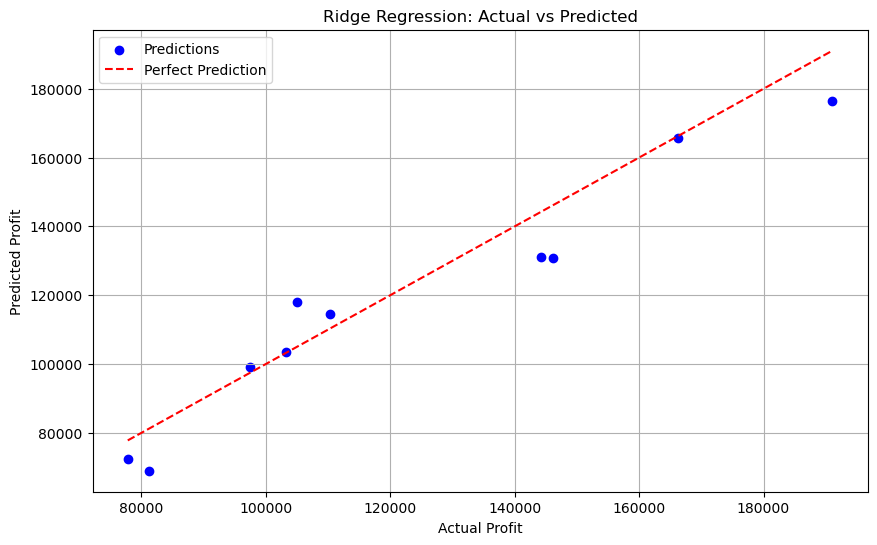

In [21]:
# Visualizing Ridge Regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.legend()
plt.grid(True)
plt.show()

### Visualisng the Lasso Regression Results

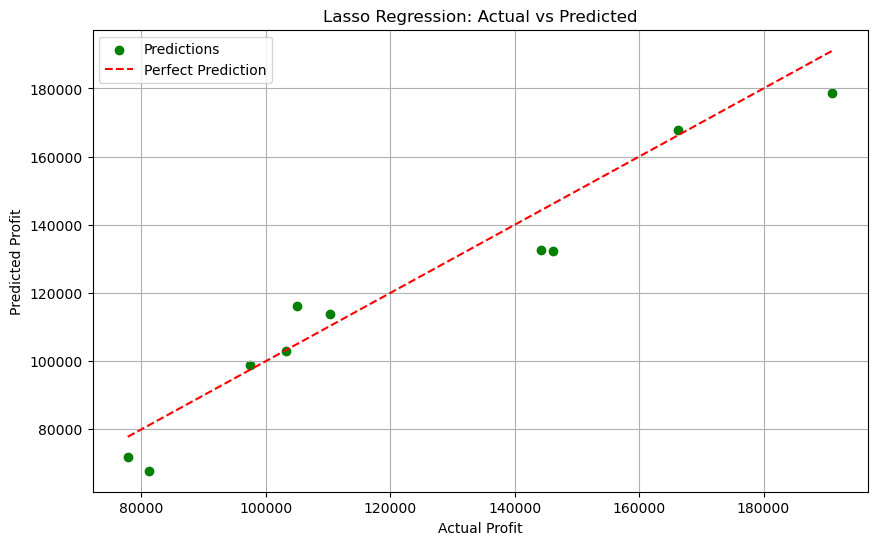

In [23]:
# Visualizing Lasso Regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='green', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.legend()
plt.grid(True)
plt.show()

### Evaluating the performance metrics of Ridge Regression

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Ridge Regression Performance Metrics (Test Set):')
print('R2 Score:', r2_score(y_test, y_pred_ridge))
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))
print('MSE:', mean_squared_error(y_test, y_pred_ridge))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge Regression Performance Metrics (Test Set):
R2 Score: 0.9226283453857743
MAE: 8018.493874481035
MSE: 98949958.62287135
RMSE: 9947.359379396692


### Evaluating the performance metrics of Lasso Regression

In [27]:
print('Lasso Regression Performance Metrics (Test Set):')
print('R2 Score:', r2_score(y_test, y_pred_lasso))
print('MAE:', mean_absolute_error(y_test, y_pred_lasso))
print('MSE:', mean_squared_error(y_test, y_pred_lasso))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso Regression Performance Metrics (Test Set):
R2 Score: 0.9347072284602278
MAE: 7514.272526934071
MSE: 83502376.60608552
RMSE: 9137.963482422412
